# New York City's Flood Data 
Author: Mark Bauer

# Importing Libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
from sodapy import Socrata
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from datetime import datetime, timezone

sns.set_theme()
plt.rcParams['savefig.facecolor'] = 'white'
%matplotlib inline

In [2]:
## documention for installing watermark: https://github.com/rasbt/watermark
%reload_ext watermark
%watermark -t -d -v -p pandas,sodapy

Python implementation: CPython
Python version       : 3.8.13
IPython version      : 8.4.0

pandas: 1.4.3
sodapy: 2.1.1



### Note:  
`WARNING:root:Requests made without an app_token will be subject to strict throttling limits.`

Read more from the SODA documentation here: https://dev.socrata.com/docs/app-tokens.html

# Analyzing Flood Datasets on NYC Open Data

In [3]:
# source domain for NYC Open Data on Socrata
socrata_domain = 'data.cityofnewyork.us'

In [4]:
client = Socrata(
    socrata_domain,
    app_token=None,
    timeout=1000
)

# reading in a list of dictionaries of our data into a pandas DataFrame
df = pd.DataFrame.from_records(client.datasets())

print('shape of data: {}'.format(df.shape))
df.head()

shape of data: (3410, 8)


,resource,classification,metadata,permalink,link,owner,creator,preview_image_url
0,"{'name': 'Civil Service List (Active)', 'id': ...","{'categories': [], 'tags': [], 'domain_categor...",{'domain': 'data.cityofnewyork.us'},https://data.cityofnewyork.us/d/vx8i-nprf,https://data.cityofnewyork.us/City-Government/...,"{'id': '5fuc-pqz2', 'user_type': 'interactive'...","{'id': '5fuc-pqz2', 'user_type': 'interactive'...",NaN
1,"{'name': 'For Hire Vehicles (FHV) - Active', '...","{'categories': [], 'tags': [], 'domain_categor...",{'domain': 'data.cityofnewyork.us'},https://data.cityofnewyork.us/d/8wbx-tsch,https://data.cityofnewyork.us/Transportation/F...,"{'id': '5fuc-pqz2', 'user_type': 'interactive'...","{'id': '5fuc-pqz2', 'user_type': 'interactive'...",NaN
2,"{'name': 'DOB Job Application Filings', 'id': ...","{'categories': ['economy', 'environment', 'hou...",{'domain': 'data.cityofnewyork.us'},https://data.cityofnewyork.us/d/ic3t-wcy2,https://data.cityofnewyork.us/Housing-Developm...,"{'id': '5fuc-pqz2', 'user_type': 'interactive'...","{'id': '5fuc-pqz2', 'user_type': 'interactive'...",NaN
3,"{'name': 'TLC New Driver Application Status', ...","{'categories': ['transportation', 'environment...",{'domain': 'data.cityofnewyork.us'},https://data.cityofnewyork.us/d/dpec-ucu7,https://data.cityofnewyork.us/Transportation/T...,"{'id': '5fuc-pqz2', 'user_type': 'interactive'...","{'id': '5fuc-pqz2', 'user_type': 'interactive'...",NaN
4,{'name': 'For Hire Vehicles (FHV) - Active Dri...,"{'categories': [], 'tags': [], 'domain_categor...",{'domain': 'data.cityofnewyork.us'},https://data.cityofnewyork.us/d/xjfq-wh2d,https://data.cityofnewyork.us/Transportation/F...,"{'id': '5fuc-pqz2', 'user_type': 'interactive'...","{'id': '5fuc-pqz2', 'user_type': 'interactive'...",NaN


In [5]:
# reading the dictionary in the resource column into a pandas DataFrame
df = pd.DataFrame.from_records(df['resource'])

print('shape of data: {}'.format(df.shape))
df.head()

shape of data: (3410, 25)


,name,id,parent_fxf,description,attribution,attribution_link,contact_email,type,updatedAt,createdAt,...,columns_datatype,columns_description,columns_format,download_count,provenance,lens_view_type,lens_display_type,blob_mime_type,hide_from_data_json,publication_date
0,Civil Service List (Active),vx8i-nprf,[],A Civil Service List consists of all candidate...,Department of Citywide Administrative Services...,None,None,dataset,2023-12-29T14:35:05.000Z,2016-06-14T21:12:15.000Z,...,"[Text, Text, Number, Text, Text, Text, Number,...",[An additional credit given to a Veteran (5 po...,"[{'displayStyle': 'plain', 'align': 'left'}, {...",59018,official,tabular,table,None,False,2023-12-29T14:35:05.000Z
1,For Hire Vehicles (FHV) - Active,8wbx-tsch,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2023-12-31T19:57:22.000Z,2015-07-16T17:33:32.000Z,...,"[Text, Text, Text, Calendar date, Text, Text, ...","[Vehicle VIN Number, Permit License Number, La...","[{'displayStyle': 'plain', 'align': 'left'}, {...",427704,official,tabular,table,None,False,2021-04-05T13:20:47.000Z
2,DOB Job Application Filings,ic3t-wcy2,[],This dataset contains all job applications sub...,Department of Buildings (DOB),None,None,dataset,2023-12-31T21:05:37.000Z,2013-04-18T15:18:56.000Z,...,"[Number, Text, Text, Text, Text, Text, Text, T...","[Enlargement SQ Footage, Equipment Work Type?...","[{'precisionStyle': 'standard', 'noCommas': 't...",53354,official,tabular,table,None,False,2020-06-22T18:23:35.000Z
3,TLC New Driver Application Status,dpec-ucu7,[],THIS DATASET IS UPDATED SEVERAL TIMES PER DAY....,Taxi and Limousine Commission (TLC),None,None,dataset,2023-12-31T17:07:35.000Z,2016-05-17T18:43:43.000Z,...,"[Text, Calendar date, Text, Text, Text, Text, ...",[Drug testing is required for Medallion and FH...,"[{'displayStyle': 'plain', 'align': 'left'}, {...",38593,official,tabular,table,None,False,2019-12-17T18:44:57.000Z
4,For Hire Vehicles (FHV) - Active Drivers,xjfq-wh2d,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2023-12-31T20:02:31.000Z,2015-07-16T17:24:02.000Z,...,"[Text, Text, Number, Text, Calendar date, Text...","[Type of License\n\n, Driver Name\n\n, FHV Lic...","[{'displayStyle': 'plain', 'align': 'left'}, {...",373790,official,tabular,table,None,False,2023-12-31T20:02:31.000Z


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3410 entries, 0 to 3409
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 3410 non-null   object
 1   id                   3410 non-null   object
 2   parent_fxf           3410 non-null   object
 3   description          3410 non-null   object
 4   attribution          3210 non-null   object
 5   attribution_link     454 non-null    object
 6   contact_email        0 non-null      object
 7   type                 3410 non-null   object
 8   updatedAt            3410 non-null   object
 9   createdAt            3410 non-null   object
 10  metadata_updated_at  3410 non-null   object
 11  data_updated_at      3223 non-null   object
 12  page_views           3410 non-null   object
 13  columns_name         3410 non-null   object
 14  columns_field_name   3410 non-null   object
 15  columns_datatype     3410 non-null   object
 16  column

In [7]:
df.iloc[:5, 10:]

,metadata_updated_at,data_updated_at,page_views,columns_name,columns_field_name,columns_datatype,columns_description,columns_format,download_count,provenance,lens_view_type,lens_display_type,blob_mime_type,hide_from_data_json,publication_date
0,2023-12-29T14:35:05.000Z,2023-12-29T14:23:42.000Z,"{'page_views_last_week': 9566, 'page_views_las...","[Veteran Credit, Exam No, List No, First Name,...","[veteran_credit, exam_no, list_no, first_name,...","[Text, Text, Number, Text, Text, Text, Number,...",[An additional credit given to a Veteran (5 po...,"[{'displayStyle': 'plain', 'align': 'left'}, {...",59018,official,tabular,table,None,False,2023-12-29T14:35:05.000Z
1,2022-09-06T21:05:32.000Z,2023-12-31T19:57:22.000Z,"{'page_views_last_week': 7114, 'page_views_las...","[Vehicle VIN Number, Permit License Number, La...","[vehicle_vin_number, permit_license_number, la...","[Text, Text, Text, Calendar date, Text, Text, ...","[Vehicle VIN Number, Permit License Number, La...","[{'displayStyle': 'plain', 'align': 'left'}, {...",427704,official,tabular,table,None,False,2021-04-05T13:20:47.000Z
2,2020-06-23T02:08:44.000Z,2023-12-31T21:05:37.000Z,"{'page_views_last_week': 282, 'page_views_last...","[Enlargement SQ Footage, Equipment, Plumbing, ...","[enlargement_sq_footage, equipment, plumbing, ...","[Number, Text, Text, Text, Text, Text, Text, T...","[Enlargement SQ Footage, Equipment Work Type?...","[{'precisionStyle': 'standard', 'noCommas': 't...",53354,official,tabular,table,None,False,2020-06-22T18:23:35.000Z
3,2022-05-09T22:28:03.000Z,2023-12-31T17:07:35.000Z,"{'page_views_last_week': 165, 'page_views_last...","[Drug Test, Last Updated, Type, FRU Interview ...","[drug_test, lastupdate, type, fru_interview_sc...","[Text, Calendar date, Text, Text, Text, Text, ...",[Drug testing is required for Medallion and FH...,"[{'displayStyle': 'plain', 'align': 'left'}, {...",38593,official,tabular,table,None,False,2019-12-17T18:44:57.000Z
4,2023-12-31T20:02:31.000Z,2023-12-31T19:58:26.000Z,"{'page_views_last_week': 2590, 'page_views_las...","[Type, Name, License Number, Last Time Updated...","[type, name, license_number, last_time_updated...","[Text, Text, Number, Text, Calendar date, Text...","[Type of License\n\n, Driver Name\n\n, FHV Lic...","[{'displayStyle': 'plain', 'align': 'left'}, {...",373790,official,tabular,table,None,False,2023-12-31T20:02:31.000Z


In [8]:
# we need to explode these columns and expand as new columns
df = pd.concat(
    [df.drop(['page_views'], axis=1), df['page_views'].apply(pd.Series)],
    axis=1
)

df.head()

,name,id,parent_fxf,description,attribution,attribution_link,contact_email,type,updatedAt,createdAt,...,lens_display_type,blob_mime_type,hide_from_data_json,publication_date,page_views_last_week,page_views_last_month,page_views_total,page_views_last_week_log,page_views_last_month_log,page_views_total_log
0,Civil Service List (Active),vx8i-nprf,[],A Civil Service List consists of all candidate...,Department of Citywide Administrative Services...,None,None,dataset,2023-12-29T14:35:05.000Z,2016-06-14T21:12:15.000Z,...,table,None,False,2023-12-29T14:35:05.000Z,9566.0,22919.0,2521920.0,13.223851,14.484319,21.266092
1,For Hire Vehicles (FHV) - Active,8wbx-tsch,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2023-12-31T19:57:22.000Z,2015-07-16T17:33:32.000Z,...,table,None,False,2021-04-05T13:20:47.000Z,7114.0,36167.0,2503179.0,12.796648,15.142426,21.255331
2,DOB Job Application Filings,ic3t-wcy2,[],This dataset contains all job applications sub...,Department of Buildings (DOB),None,None,dataset,2023-12-31T21:05:37.000Z,2013-04-18T15:18:56.000Z,...,table,None,False,2020-06-22T18:23:35.000Z,282.0,1733.0,2338819.0,8.144658,10.759888,21.157349
3,TLC New Driver Application Status,dpec-ucu7,[],THIS DATASET IS UPDATED SEVERAL TIMES PER DAY....,Taxi and Limousine Commission (TLC),None,None,dataset,2023-12-31T17:07:35.000Z,2016-05-17T18:43:43.000Z,...,table,None,False,2019-12-17T18:44:57.000Z,165.0,956.0,1724008.0,7.375039,9.902375,20.717336
4,For Hire Vehicles (FHV) - Active Drivers,xjfq-wh2d,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2023-12-31T20:02:31.000Z,2015-07-16T17:24:02.000Z,...,table,None,False,2023-12-31T20:02:31.000Z,2590.0,12511.0,1349557.0,11.339293,13.611025,20.364056


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3410 entries, 0 to 3409
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       3410 non-null   object 
 1   id                         3410 non-null   object 
 2   parent_fxf                 3410 non-null   object 
 3   description                3410 non-null   object 
 4   attribution                3210 non-null   object 
 5   attribution_link           454 non-null    object 
 6   contact_email              0 non-null      object 
 7   type                       3410 non-null   object 
 8   updatedAt                  3410 non-null   object 
 9   createdAt                  3410 non-null   object 
 10  metadata_updated_at        3410 non-null   object 
 11  data_updated_at            3223 non-null   object 
 12  columns_name               3410 non-null   object 
 13  columns_field_name         3410 non-null   objec

In [10]:
# convert to datetime
today = datetime.now(timezone.utc)
df['createdAt'] = pd.to_datetime(df['createdAt'])

df['days_elapsed'] = (today - df['createdAt']).dt.days
df['year_month_day'] = pd.to_datetime(df['createdAt'].dt.strftime('%Y-%m-%d'))

df.head()

,name,id,parent_fxf,description,attribution,attribution_link,contact_email,type,updatedAt,createdAt,...,hide_from_data_json,publication_date,page_views_last_week,page_views_last_month,page_views_total,page_views_last_week_log,page_views_last_month_log,page_views_total_log,days_elapsed,year_month_day
0,Civil Service List (Active),vx8i-nprf,[],A Civil Service List consists of all candidate...,Department of Citywide Administrative Services...,None,None,dataset,2023-12-29T14:35:05.000Z,2016-06-14 21:12:15+00:00,...,False,2023-12-29T14:35:05.000Z,9566.0,22919.0,2521920.0,13.223851,14.484319,21.266092,2756,2016-06-14
1,For Hire Vehicles (FHV) - Active,8wbx-tsch,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2023-12-31T19:57:22.000Z,2015-07-16 17:33:32+00:00,...,False,2021-04-05T13:20:47.000Z,7114.0,36167.0,2503179.0,12.796648,15.142426,21.255331,3090,2015-07-16
2,DOB Job Application Filings,ic3t-wcy2,[],This dataset contains all job applications sub...,Department of Buildings (DOB),None,None,dataset,2023-12-31T21:05:37.000Z,2013-04-18 15:18:56+00:00,...,False,2020-06-22T18:23:35.000Z,282.0,1733.0,2338819.0,8.144658,10.759888,21.157349,3909,2013-04-18
3,TLC New Driver Application Status,dpec-ucu7,[],THIS DATASET IS UPDATED SEVERAL TIMES PER DAY....,Taxi and Limousine Commission (TLC),None,None,dataset,2023-12-31T17:07:35.000Z,2016-05-17 18:43:43+00:00,...,False,2019-12-17T18:44:57.000Z,165.0,956.0,1724008.0,7.375039,9.902375,20.717336,2784,2016-05-17
4,For Hire Vehicles (FHV) - Active Drivers,xjfq-wh2d,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2023-12-31T20:02:31.000Z,2015-07-16 17:24:02+00:00,...,False,2023-12-31T20:02:31.000Z,2590.0,12511.0,1349557.0,11.339293,13.611025,20.364056,3090,2015-07-16


In [11]:
ids = [
    'uihr-hn7s',
    'uyj8-7rv5',
    '7r5q-vr7p',
    '5rzh-cyqd',
    'w8eg-8ha6',
    '6an6-9htp',
    'ezfn-5dsb',
    'ajyu-7sgg',
    'hbw8-2bah',
    'qwca-zqw3',
    '3vjp-ybhy',
    'cyvg-fsk8',
    'q7rf-ks4h',
    'ebsy-4b6x',
    'p8e8-yh4m',
    'amfa-s2y8',
    'mzds-2cdc',
    'bsin-59hv',
    'spjh-pz7h',
    'dpc8-z3jc',
    'uex9-rfq8',
    'hgx4-8ukb',
]

df = df.loc[df['id'].isin(ids)].reset_index(drop=True)

print('shape of data: {}'.format(df.shape))
df.head()

shape of data: (22, 32)


,name,id,parent_fxf,description,attribution,attribution_link,contact_email,type,updatedAt,createdAt,...,hide_from_data_json,publication_date,page_views_last_week,page_views_last_month,page_views_total,page_views_last_week_log,page_views_last_month_log,page_views_total_log,days_elapsed,year_month_day
0,Sandy Inundation Zone,uyj8-7rv5,[],Areas of New York City that were flooded as a ...,Department of Small Business Services (SBS),None,None,map,2023-12-13T02:12:05.000Z,2015-11-09 23:21:21+00:00,...,False,2015-11-09T23:21:45.000Z,65.0,578.0,53510.0,6.044394,9.177420,15.707548,2973,2015-11-09
1,Sea Level Rise Maps (2050s 500-year Floodplain),qwca-zqw3,[],This is the 500-Year Floodplain for the 2050s ...,Mayor's Office of Climate and Sustainability,None,None,map,2021-09-16T16:38:40.000Z,2013-07-23 21:56:45+00:00,...,False,2013-07-23T21:57:15.000Z,234.0,863.0,42514.0,7.876517,9.754888,15.375684,3812,2013-07-23
2,1 foot Digital Elevation Model (DEM),dpc8-z3jc,[],NYC 1foot Digital Elevation Model:\r\nA bare-e...,Office of Technology and Innovation (OTI),None,None,href,2022-09-23T19:23:09.000Z,2013-08-09 23:09:58+00:00,...,False,2013-08-23T17:40:18.000Z,65.0,353.0,32161.0,6.044394,8.467606,14.973070,3795,2013-08-09
3,Sea Level Rise Maps (2020s 100-year Floodplain),ezfn-5dsb,[],This is the 100-Year Floodplain for the 2020s ...,Mayor's Office of Climate and Sustainability,None,None,map,2021-09-16T16:43:22.000Z,2013-07-23 21:05:21+00:00,...,False,2013-07-23T21:05:48.000Z,56.0,385.0,25945.0,5.832890,8.592457,14.663225,3813,2013-07-23
4,DEP Green Infrastructure,spjh-pz7h,[],NYC Green Infrastructure Program initiatives. ...,Department of Environmental Protection (DEP),None,None,map,2023-12-13T02:19:50.000Z,2017-08-31 20:33:51+00:00,...,False,2017-08-31T20:33:51.000Z,78.0,401.0,14785.0,6.303781,8.651052,13.851944,2313,2017-08-31


In [12]:
df['download_per_day'] = round(df['download_count'] / df['days_elapsed'], 2)
df['page_views_per_day'] = round(df['page_views_total'] / df['days_elapsed'], 2)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   name                       22 non-null     object             
 1   id                         22 non-null     object             
 2   parent_fxf                 22 non-null     object             
 3   description                22 non-null     object             
 4   attribution                19 non-null     object             
 5   attribution_link           4 non-null      object             
 6   contact_email              0 non-null      object             
 7   type                       22 non-null     object             
 8   updatedAt                  22 non-null     object             
 9   createdAt                  22 non-null     datetime64[ns, UTC]
 10  metadata_updated_at        22 non-null     object             
 11  data_upd

# Top Downloads

In [13]:
(df
 .sort_values(by='download_count', ascending=False)
 .loc[:, ['name', 'year_month_day', 'download_count', 'download_per_day']]
 .astype({'download_count':int, 'download_per_day':float})
 .head(10)
)

,name,year_month_day,download_count,download_per_day
3,Sea Level Rise Maps (2020s 100-year Floodplain),2013-07-23,211663,55.51
5,Hurricane Evacuation Zones,2015-07-14,41530,13.43
4,DEP Green Infrastructure,2017-08-31,27796,12.02
0,Sandy Inundation Zone,2015-11-09,20289,6.82
2,1 foot Digital Elevation Model (DEM),2013-08-09,6524,1.72
7,NYC Stormwater Flood Map - Extreme Flood with ...,2021-06-07,2982,3.18
6,Sea Level Rise Maps (2050s 100-year Floodplain),2013-07-23,2541,0.67
1,Sea Level Rise Maps (2050s 500-year Floodplain),2013-07-23,2414,0.63
9,NYC Stormwater Flood Map - Moderate Flood with...,2022-08-17,2086,4.16
10,Projected Sea Level Rise,2017-07-12,1895,0.80


In [14]:
(df
 .sort_values(by='download_per_day', ascending=False)
 .loc[:, ['name', 'year_month_day', 'download_count', 'download_per_day']]
 .astype({'download_count':int, 'download_per_day':float})
 .head(10)
)

,name,year_month_day,download_count,download_per_day
3,Sea Level Rise Maps (2020s 100-year Floodplain),2013-07-23,211663,55.51
5,Hurricane Evacuation Zones,2015-07-14,41530,13.43
4,DEP Green Infrastructure,2017-08-31,27796,12.02
0,Sandy Inundation Zone,2015-11-09,20289,6.82
9,NYC Stormwater Flood Map - Moderate Flood with...,2022-08-17,2086,4.16
7,NYC Stormwater Flood Map - Extreme Flood with ...,2021-06-07,2982,3.18
16,Building Elevation and Subgrade (BES),2023-09-12,251,2.28
11,NYC Stormwater Flood Map - Moderate Flood with...,2021-06-07,1833,1.96
2,1 foot Digital Elevation Model (DEM),2013-08-09,6524,1.72
8,DEP's Citywide Parcel-Based Impervious Area GI...,2020-07-13,1493,1.18


# Top Page Views

In [15]:
(df
 .sort_values(by='page_views_total', ascending=False)
 .loc[:, [
     'name', 'year_month_day',
     'page_views_per_day',
     'page_views_last_week', 'page_views_last_month', 'page_views_total']]
 .astype({
     'page_views_total':int, 'page_views_per_day':float,
     'page_views_last_week':int, 'page_views_last_month':int})
 .head(10)
)

,name,year_month_day,page_views_per_day,page_views_last_week,page_views_last_month,page_views_total
0,Sandy Inundation Zone,2015-11-09,18.00,65,578,53510
1,Sea Level Rise Maps (2050s 500-year Floodplain),2013-07-23,11.15,234,863,42514
2,1 foot Digital Elevation Model (DEM),2013-08-09,8.47,65,353,32161
3,Sea Level Rise Maps (2020s 100-year Floodplain),2013-07-23,6.80,56,385,25945
4,DEP Green Infrastructure,2017-08-31,6.39,78,401,14785
5,Hurricane Evacuation Zones,2015-07-14,3.32,11,126,10254
6,Sea Level Rise Maps (2050s 100-year Floodplain),2013-07-23,2.66,30,178,10145
7,NYC Stormwater Flood Map - Extreme Flood with ...,2021-06-07,7.57,22,189,7089
8,DEP's Citywide Parcel-Based Impervious Area GI...,2020-07-13,5.35,17,159,6771
9,NYC Stormwater Flood Map - Moderate Flood with...,2022-08-17,8.69,22,272,4355


In [16]:
(df
 .sort_values(by='page_views_per_day', ascending=False)
 .loc[:, [
     'name', 'year_month_day',
     'page_views_per_day',
     'page_views_last_week', 'page_views_last_month', 'page_views_total']]
 .astype({
     'page_views_total':int, 'page_views_per_day':float,
     'page_views_last_week':int, 'page_views_last_month':int})
 .head(10)
)

,name,year_month_day,page_views_per_day,page_views_last_week,page_views_last_month,page_views_total
0,Sandy Inundation Zone,2015-11-09,18.00,65,578,53510
1,Sea Level Rise Maps (2050s 500-year Floodplain),2013-07-23,11.15,234,863,42514
16,Building Elevation and Subgrade (BES),2023-09-12,9.61,12,101,1057
9,NYC Stormwater Flood Map - Moderate Flood with...,2022-08-17,8.69,22,272,4355
2,1 foot Digital Elevation Model (DEM),2013-08-09,8.47,65,353,32161
7,NYC Stormwater Flood Map - Extreme Flood with ...,2021-06-07,7.57,22,189,7089
3,Sea Level Rise Maps (2020s 100-year Floodplain),2013-07-23,6.80,56,385,25945
4,DEP Green Infrastructure,2017-08-31,6.39,78,401,14785
8,DEP's Citywide Parcel-Based Impervious Area GI...,2020-07-13,5.35,17,159,6771
11,NYC Stormwater Flood Map - Moderate Flood with...,2021-06-07,4.25,21,140,3984


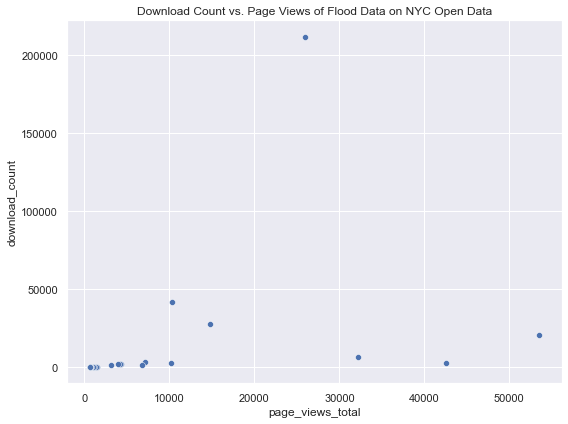

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.scatterplot(
    x=df['page_views_total'],
    y=df['download_count'],
    ax=ax
)

plt.title('Download Count vs. Page Views of Flood Data on NYC Open Data')

plt.tight_layout()

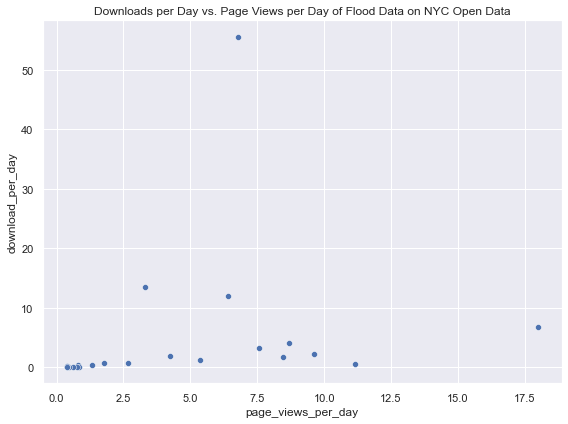

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.scatterplot(
    x=df['page_views_per_day'],
    y=df['download_per_day'],
    ax=ax
)

plt.title('Downloads per Day vs. Page Views per Day of Flood Data on NYC Open Data')

plt.tight_layout()